Data Science Project
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("survey.csv")
print(df.head())

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [49]:
df.value_counts(subset="Gender")

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Cis Male                                            2
Female                                              2
Female (trans)                                      2
A little about you                                  1
femail                                              1
cis-female/femme                                    1
fluid                

In [50]:
#Cleaning gender column
female_names = {'Female ','f','female', 'F', 'Woman', 'Female', 'femail', 'cis-female/femme', 'Trans-female', 'Cis Female', 'Femake', 'Female (cis)', 'Trans woman','woman', "Female (trans)" }
male_names = {'Male', 'Male ', 'male', 'M', 'm', 'Make', 'Male-ish', 'Man', 'Cis Male', 'maile', 'msle', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'Male (CIS)', 'Mal', 'Mail', 'Guy (-ish) ^_^', 'Cis Man', 'something kinda male?'}
non_names = {'Agender', 'All', 'Androgyne', 'Enby', 'Genderqueer', 'Nah', 'male leaning androgynous', 'fluid', 'Neuter', 'non-binary', 'queer', 'queer/she/they'}
df.replace(to_replace = female_names, value = "Female", inplace=True)
df.replace(to_replace = male_names, value = "Male", inplace=True)
df.replace(to_replace = non_names, value = "Gender non-conforming", inplace=True)
#print(df)

In [51]:
df.value_counts(subset="Gender")

Gender
Male                     994
Female                   251
Gender non-conforming     12
A little about you         1
p                          1
dtype: int64

In [52]:
#delete p and a little about you 
df.drop(df.loc[df["Gender"] == "p"].index, inplace = True)
df.drop(df.loc[df["Gender"] == "A little about you"].index, inplace = True)

In [53]:
df.value_counts(subset="Gender")

Gender
Male                     994
Female                   251
Gender non-conforming     12
dtype: int64

In [55]:
df.drop(df.loc[df["Age"] > 100].index, inplace = True)
df.drop(df.loc[df["Age"] < 18].index, inplace = True)
df.value_counts(subset="Age")

Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
20     6
48     6
50     6
51     5
56     4
49     4
57     3
55     3
54     3
47     2
60     2
53     1
58     1
61     1
62     1
65     1
72     1
dtype: int64

In [117]:
df.describe(include ="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1251,1251.000000,1251,1251,738,1233,1251,1251,989,1251,...,1251,1251,1251,1251,1251,1251,1251,1251,1251,161
unique,1239,NaN,3,46,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,157
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,989,746,138,1091,762,632,464,289,...,561,487,920,771,512,1003,555,574,1070,5
mean,NaN,32.076739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.288272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


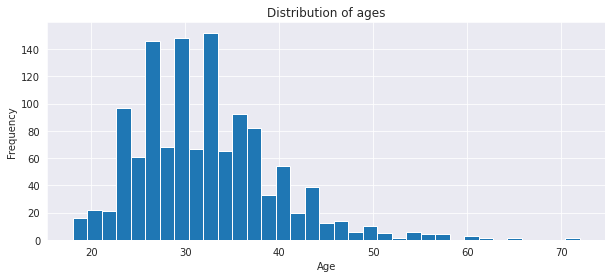

In [122]:
#df.plt.hist(column = 'Age', bins= int(np.sqrt(len(df['Age']))))
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
plt.hist(df['Age'], bins= int(np.sqrt(1275)))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of ages")
plt.show()

In [57]:
#df.set_index('benefits').plot(kind='bar', stacked=True, color=['green', 'red'])

<AxesSubplot:xlabel='supervisor', ylabel='count'>

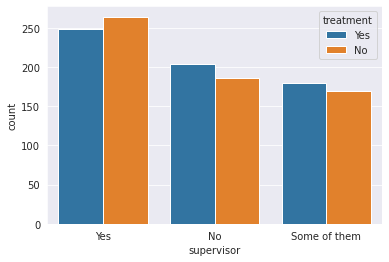

In [66]:
sns.countplot(data=df, x='supervisor', hue='treatment')

Making stacked bar plot

In [74]:
data_chart = df[['treatment','seek_help', 'coworkers', 'supervisor', 'care_options' ]] 
data_encoding = {'Yes': 1, 'No': 2, 'Some of them': 3, "Don't know": 4, 'Not sure': 4} 
# dont know and not sure are treated the same
for i in data_chart.columns: 
    data_chart[i] = data_chart[i].replace(data_encoding)
    
data_chart.head()

/tmp/ipykernel_198/343390375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chart[i] = data_chart[i].replace(data_encoding)


,treatment,seek_help,coworkers,supervisor,care_options
0,1,1,3,1,4
1,2,4,2,2,2
2,2,2,1,1,2
3,1,2,3,2,1
4,2,4,3,1,2


In [87]:
frequencies = {}
for i in data_chart.columns: 
    frequencies[i] = data_chart[i].value_counts()
    
plotdata = pd.DataFrame(frequencies)
plotdata.fillna(0, inplace=True)

plotdata = plotdata.transpose()
plotdata_percent = plotdata.div(plotdata.sum(axis=1), axis = 0)*100
plotdata.head()
plotdata_percent.head()

,1,2,3,4
treatment,50.519584,49.480416,0.000000,0.000000
seek_help,19.744205,51.239009,0.000000,29.016787
coworkers,17.745803,20.623501,61.630695,0.000000
supervisor,40.927258,31.175060,27.897682,0.000000
care_options,35.091926,39.888090,0.000000,25.019984


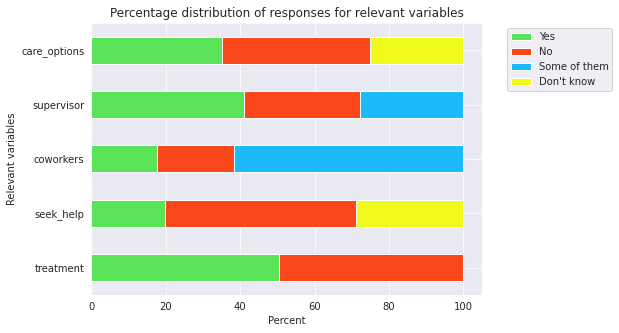

In [123]:
data_colors= {1: '#5ae258', 2: '#fa471b',3: '#1bbafa',  4: '#f0fa1b'} 

plotdata_percent.plot(kind='barh', stacked=True, color=data_colors, figsize=(7, 5))
plt.legend(data_encoding, bbox_to_anchor = (1.05, 1))
plt.title("Percentage distribution of responses for relevant variables")
plt.ylabel("Relevant variables")
plt.xlabel("Percent")
plt.show()